# Лабораторная работа №5.  Цифровой спектральный анализ.

Лаборатория цифровой обработки сигналов, МФТИ

Вклад задач в итоговую оценку: задача 2.1 — 2 балла, остальные по 1 баллу. Максимальная оценка ограничивается с момента наступления срока сдачи следующей лабораторной работы.

В названии файла заменить `familyname` на свою фамилию. 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот,
        соотвествующих вычисленным значениям
        спектральной функции
    complex
        значения спектральной функции
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга | Бартлетта | Хэмминга |
| $w_3[k]$ | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  | $20$ | $16$ |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ).
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного.

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.

1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа?


In [2]:
N = 64
M = 2048
n0 = 20

In [3]:
k = np.arange(0, N, 1)
x = np.cos(2 * np.pi * n0 * k / N) + np.cos(2 * np.pi * (n0 + 2) * k / N)

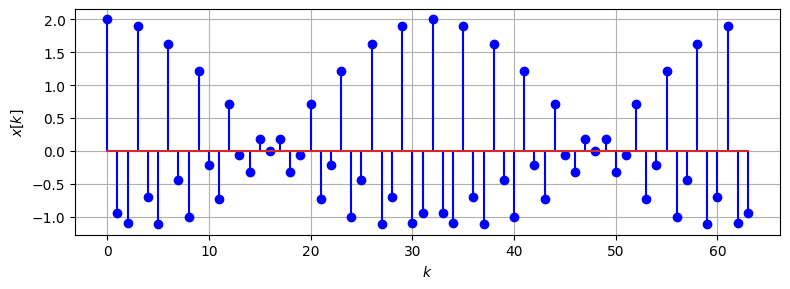

In [4]:
plt.figure(figsize=[8, 3])
plt.stem(k, x, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')

plt.grid()
plt.tight_layout()
plt.show()

In [5]:
X = np.fft.fft(x, 2048) 
n = np.arange(X.size)

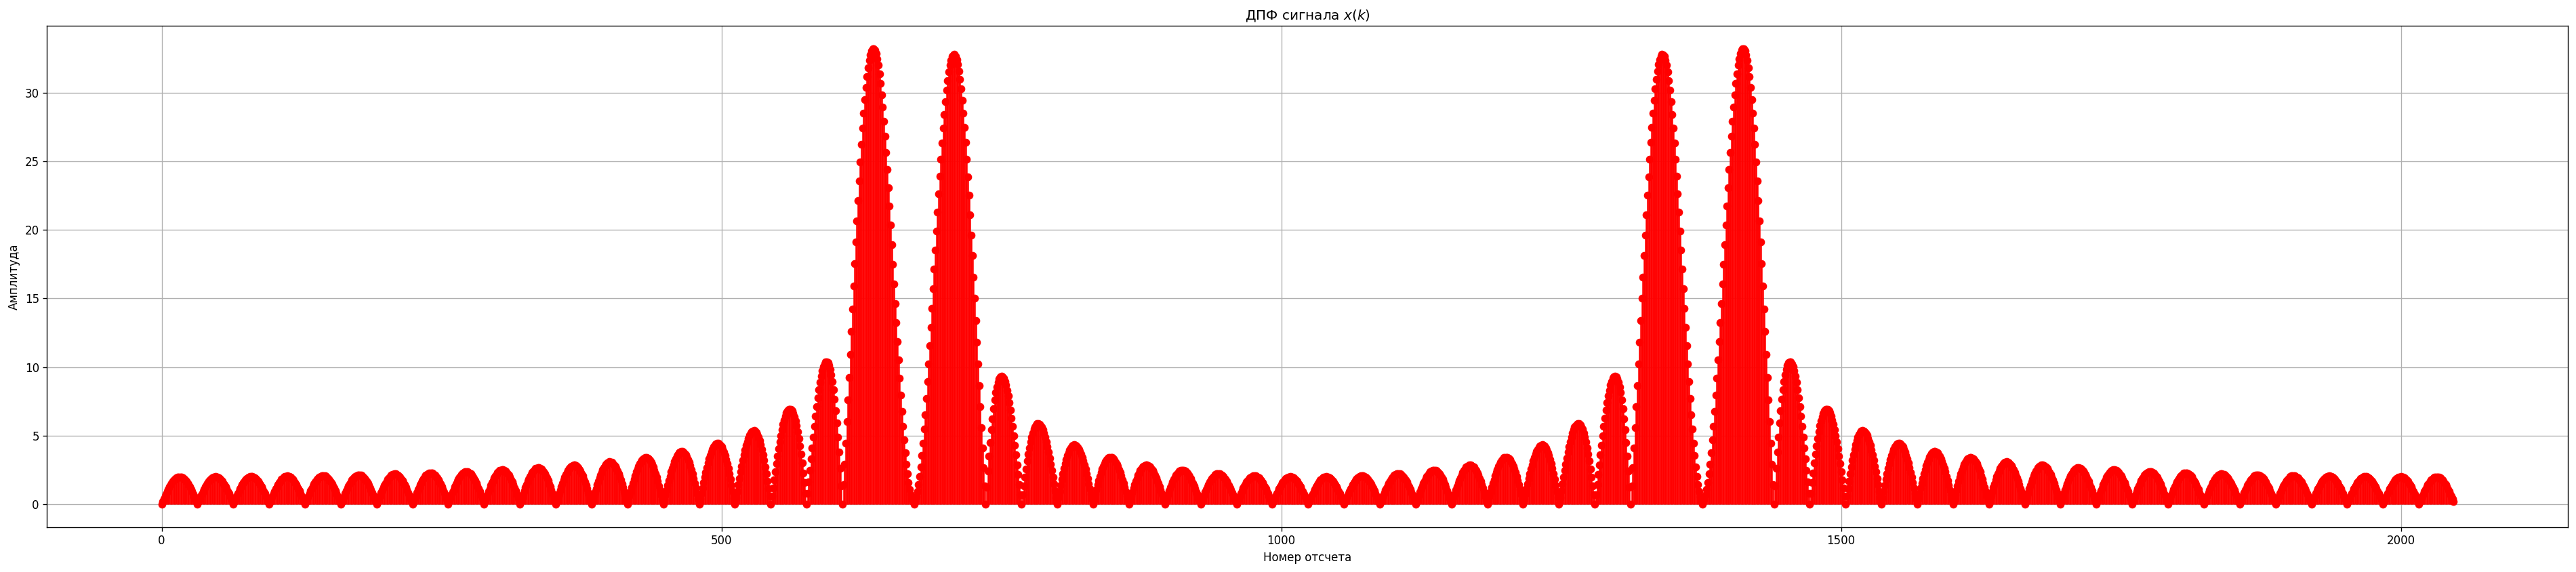

In [6]:

plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , abs(X), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ сигнала $x(k)$")
plt.grid()
plt.show()

In [7]:
def plot_window(w):
    plt.figure(figsize=[16, 3], dpi=120)
    plt.subplot(1, 3, 1)
    k=np.arange(N)
    plt.stem(k, w)
    plt.xlabel('$k$')
    plt.ylabel('$w[k]$')
    nu, Wn = DTFT(w, M=16*2048)
    plt.subplot(1, 3, 2)
    k=np.arange(N)
    plt.plot(nu, abs(Wn))
    plt.xlabel('$\\nu$')
    plt.ylabel('$|W(\\nu)|$')
    plt.grid()
    plt.subplot(1, 3, 3)
    k=np.arange(N)
    with np.errstate(divide='ignore'):
        amplitudes =  20*np.log10(abs(Wn)/max(abs(Wn)))
        plt.plot(nu, amplitudes)
    plt.ylim(ymin=-100)
    plt.grid()
    plt.xlabel('$\\nu$')
    plt.ylabel(r'$20 \lg \; |W(\nu)\; / \;W(0)|$, дБ')
    plt.tight_layout()

    plt.show()


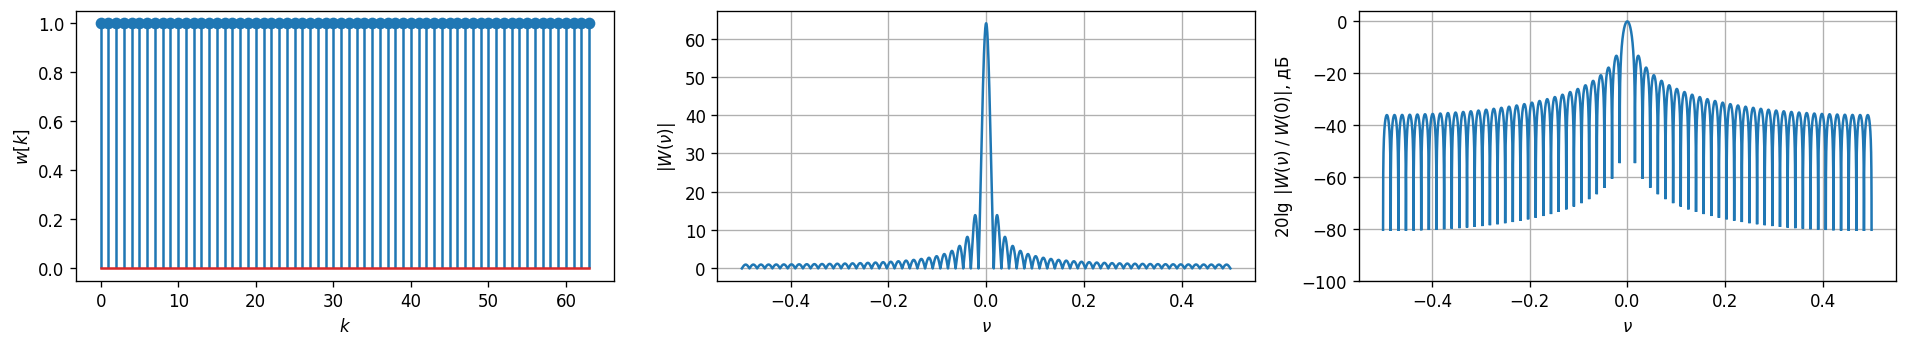

Δν = 0.03125
-3дБ Δν =  0.01390625
-6дБ Δν =  0.01875


In [8]:
w1=signal.windows.boxcar(M=N, sym=False)
plot_window(w1)
print('Δν =', 2 / N)
print('-3дБ Δν = ', 0.89 / N)
print('-6дБ Δν = ', 1.20 / N)

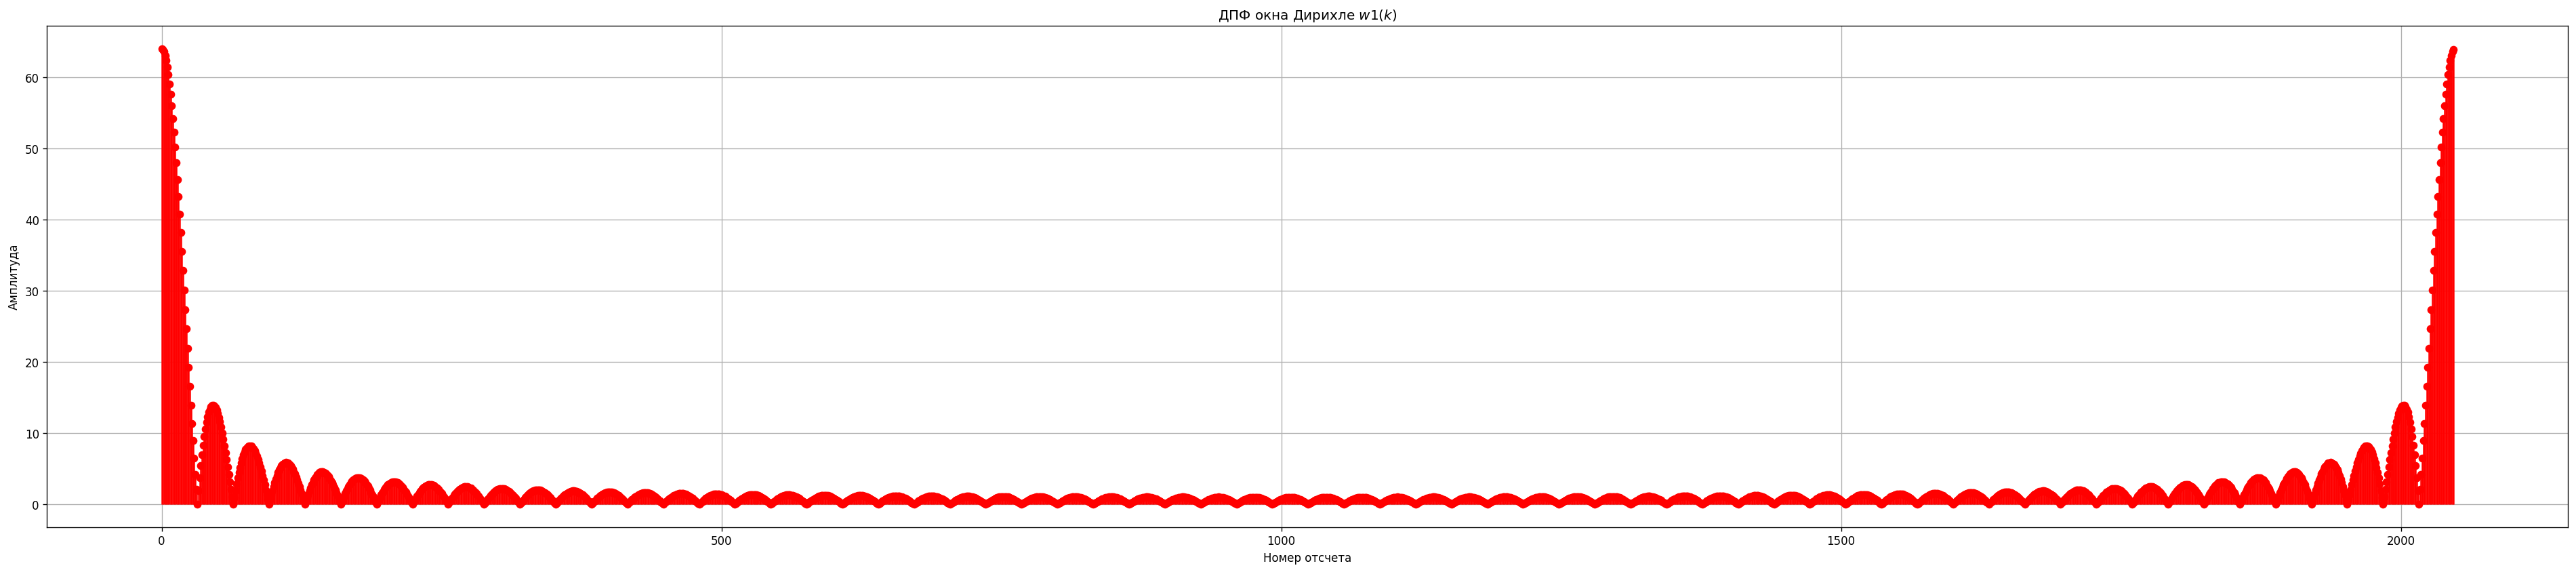

In [9]:
W1 = np.fft.fft(w1, M) 
n = np.arange(W1.size)


plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(W1), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ окна Дирихле $w1(k)$")
plt.grid()
plt.show()

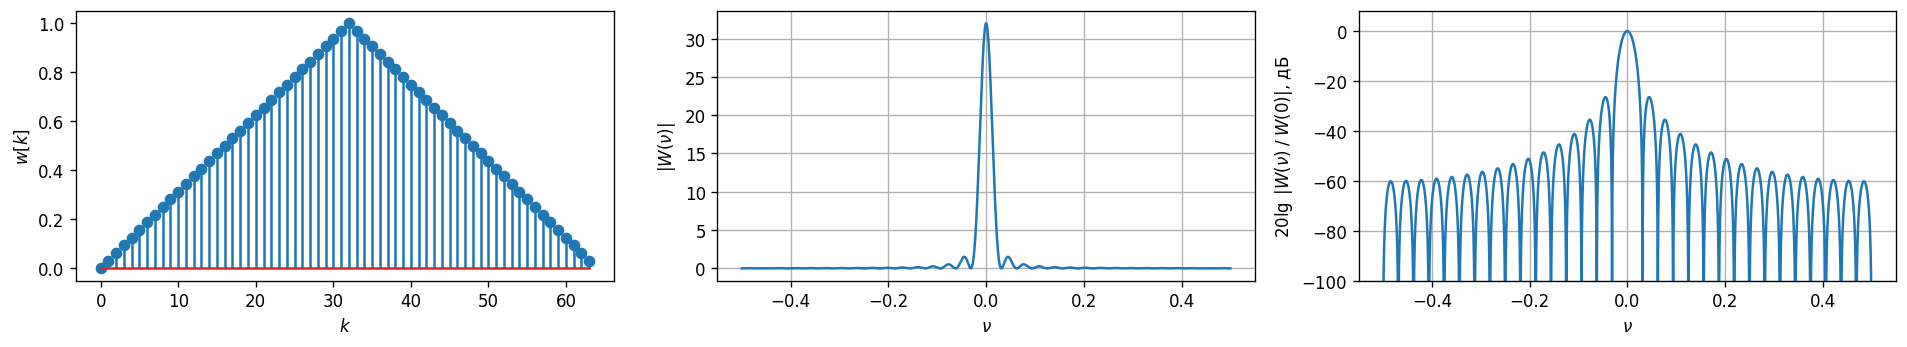

Δν = 0.03125
-3дБ Δν =  0.02
-6дБ Δν =  0.0278125


In [10]:
w2=signal.windows.bartlett(M=N, sym=False)
plot_window(w2)
print('Δν =', 2 / N)
print('-3дБ Δν = ', 1.28 / N)
print('-6дБ Δν = ', 1.78 / N)

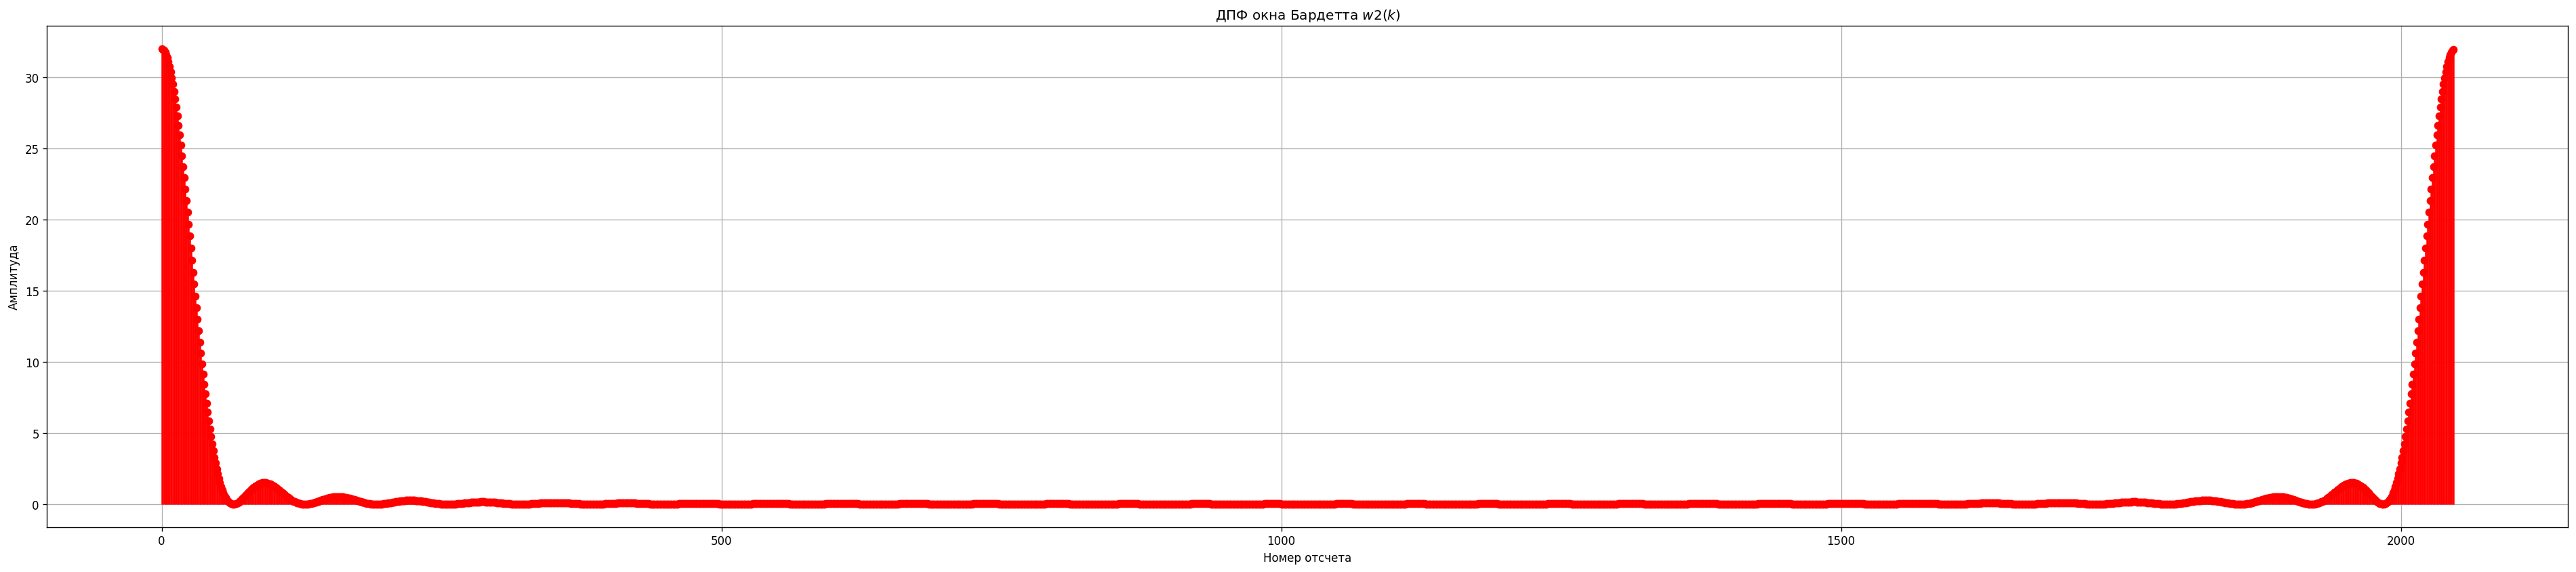

In [11]:
W2 = np.fft.fft(w2, M) 
n = np.arange(W2.size)


plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(W2), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ окна Бардетта $w2(k)$")
plt.grid()
plt.show()

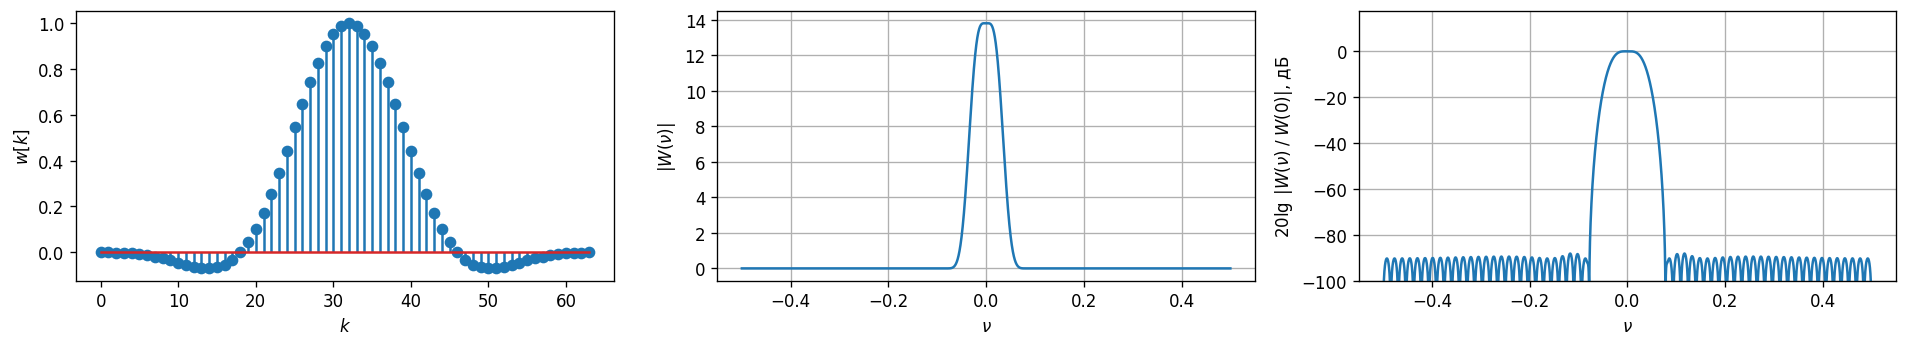

Δν = 0.03125
-3дБ Δν =  0.0584375
-6дБ Δν =  0.071875


In [12]:
w3=signal.windows.flattop(M=N, sym=False)
plot_window(w3)
print('Δν =', 2 / N)
print('-3дБ Δν = ', 3.74 / N)
print('-6дБ Δν = ', 4.60 / N)

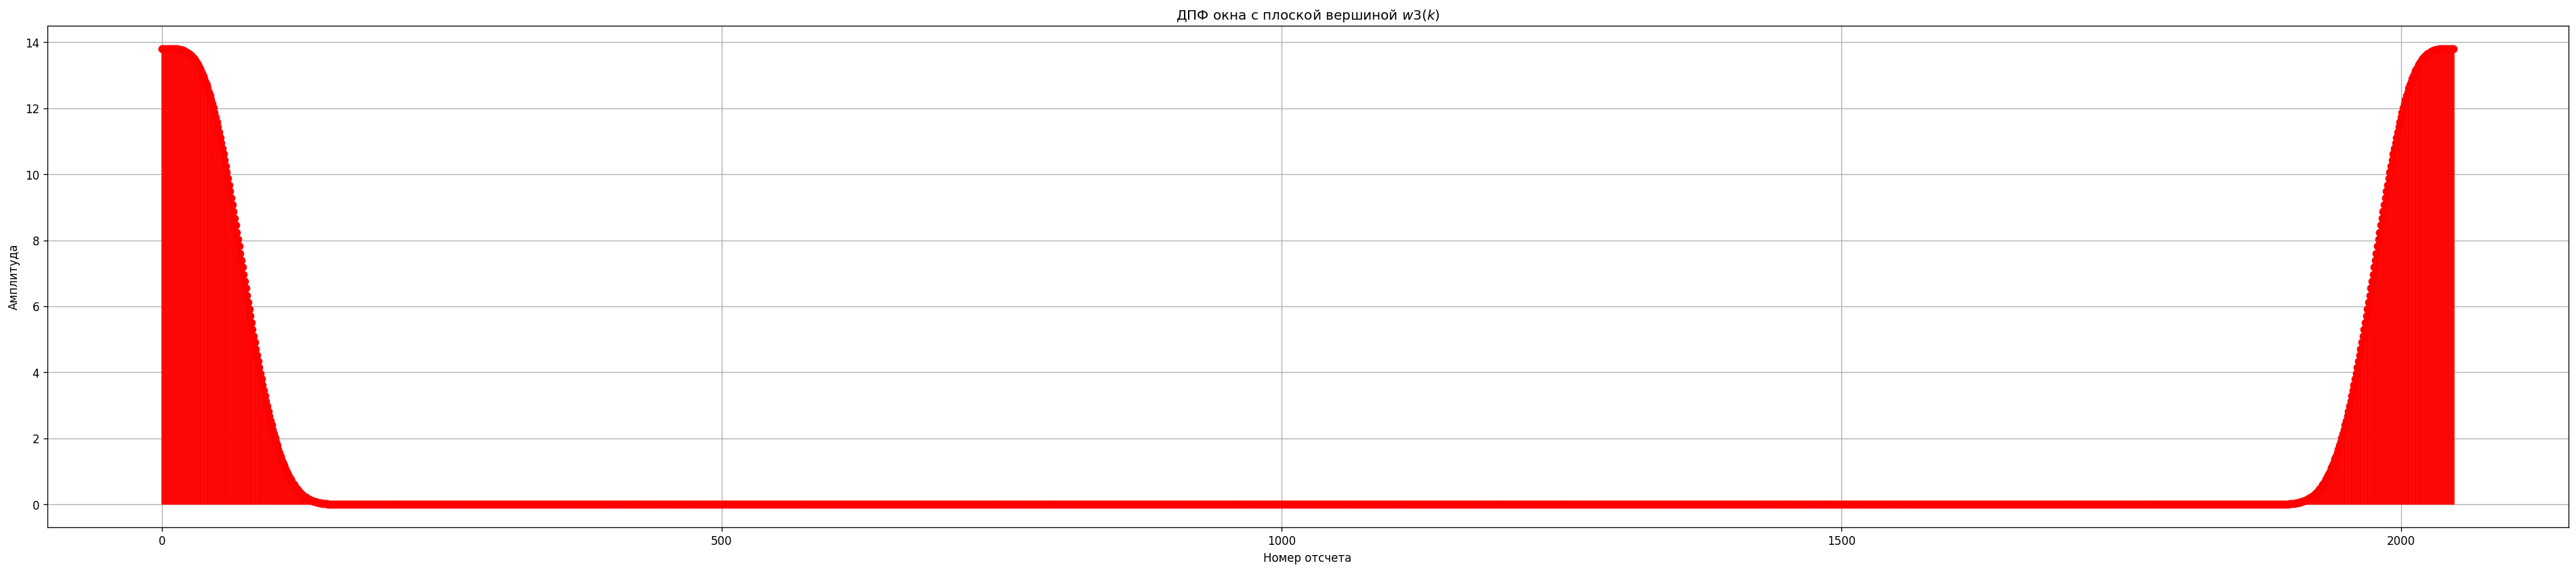

In [13]:
W3 = np.fft.fft(w3, M) 
n = np.arange(W3.size)


plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(W3), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ окна с плоской вершиной $w3(k)$")
plt.grid()
plt.show()

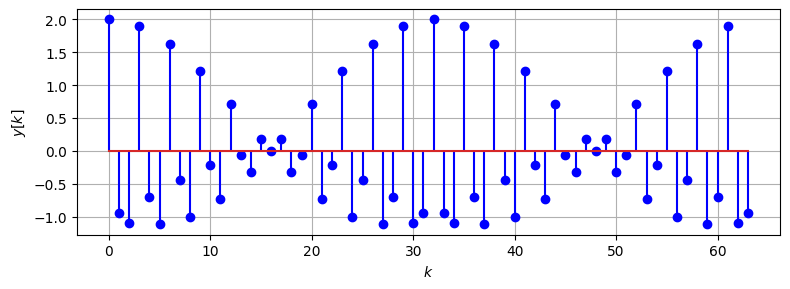

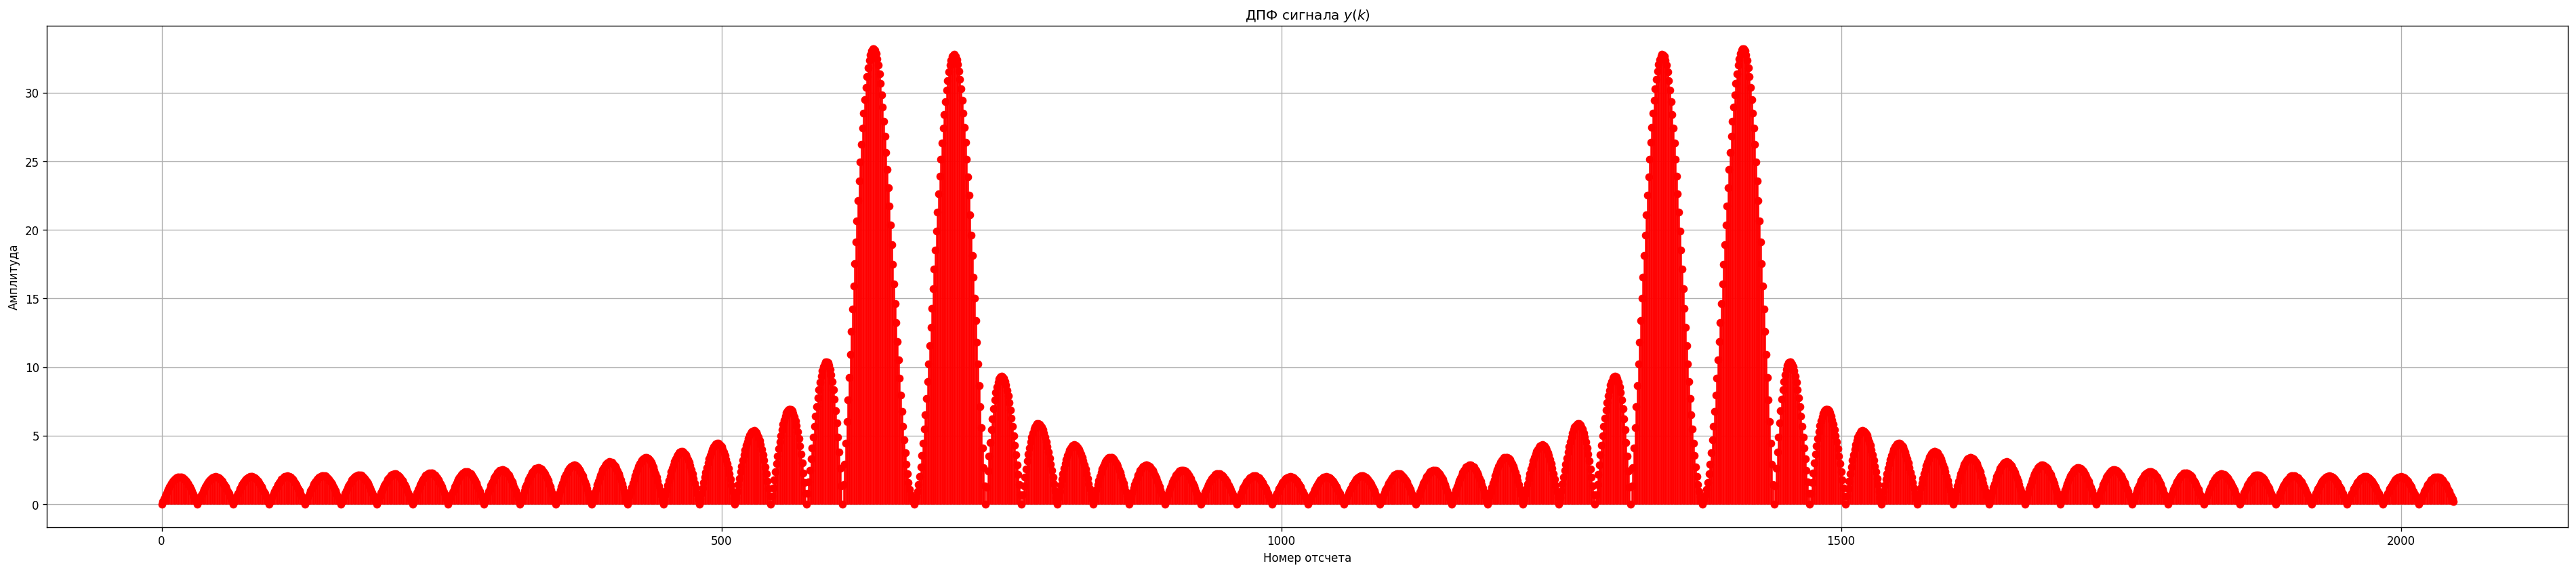

In [14]:
y = x * w1

plt.figure(figsize=[8, 3])
plt.stem(k, y, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

plt.grid()
plt.tight_layout()


nu, Y = DTFT(y, 2048)

Y_FFT = np.fft.fft(y, M) 
n = np.arange(Y_FFT.size)

plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(Y_FFT), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ сигнала $y(k)$")
plt.grid()
plt.show()




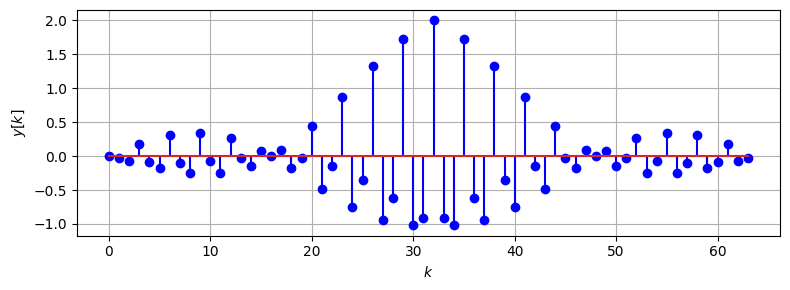

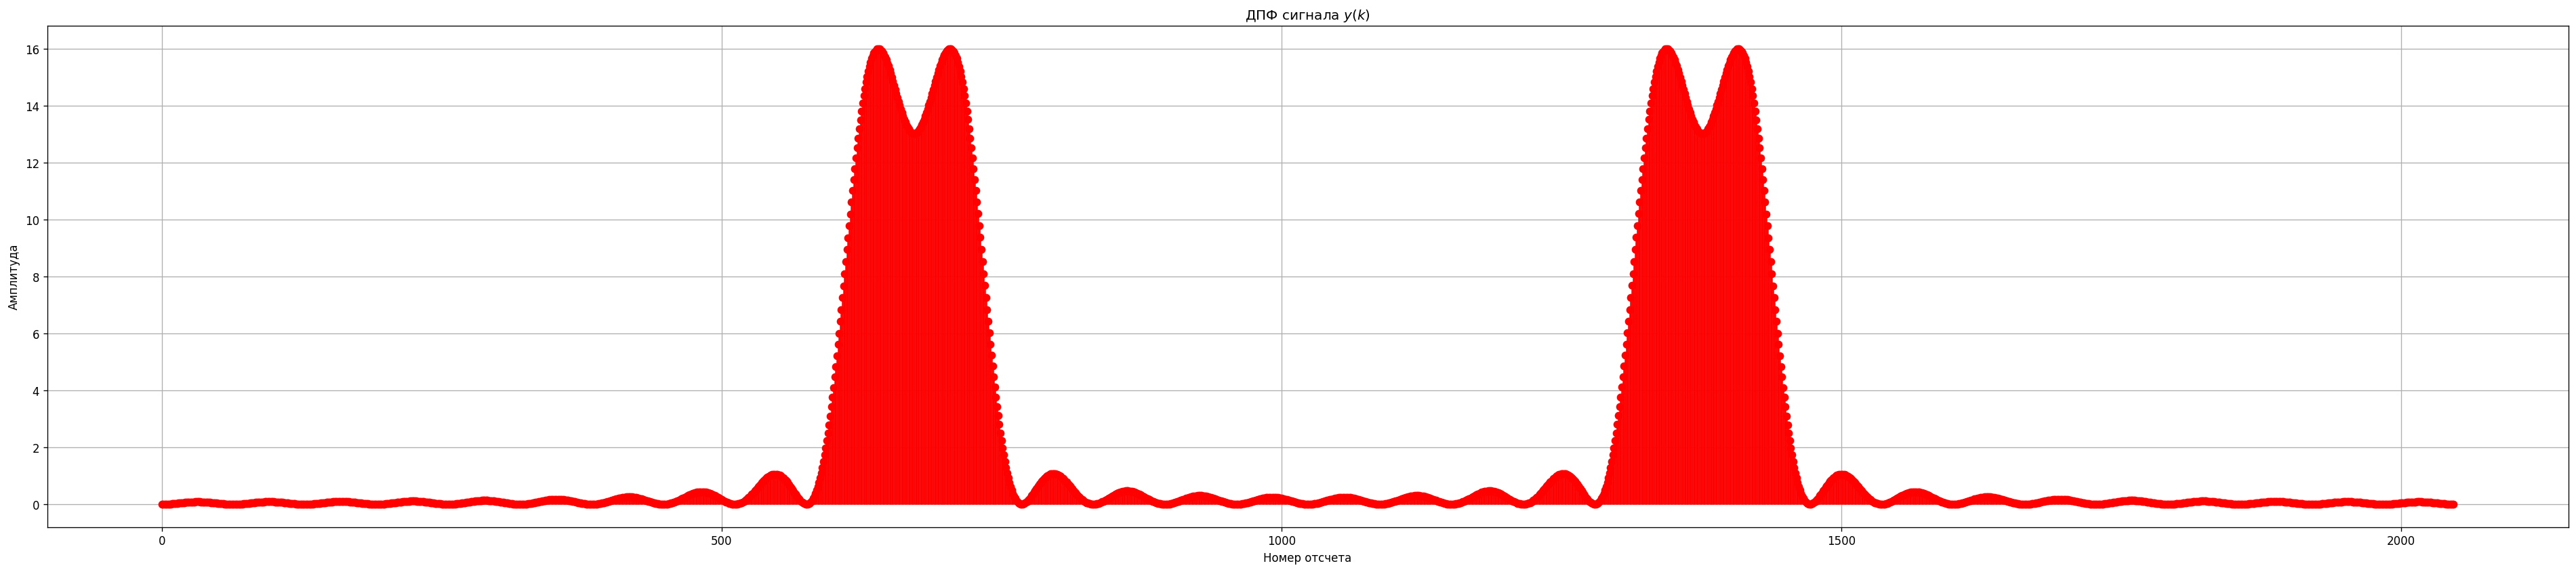

In [15]:
y = x * w2

plt.figure(figsize=[8, 3])
plt.stem(k, y, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

plt.grid()
plt.tight_layout()


nu, Y = DTFT(y, 2048)

Y_FFT = np.fft.fft(y, M) 
n = np.arange(Y_FFT.size)

plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(Y_FFT), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ сигнала $y(k)$")
plt.grid()
plt.show()

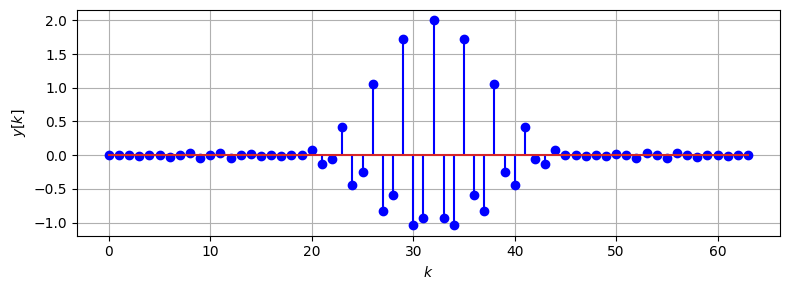

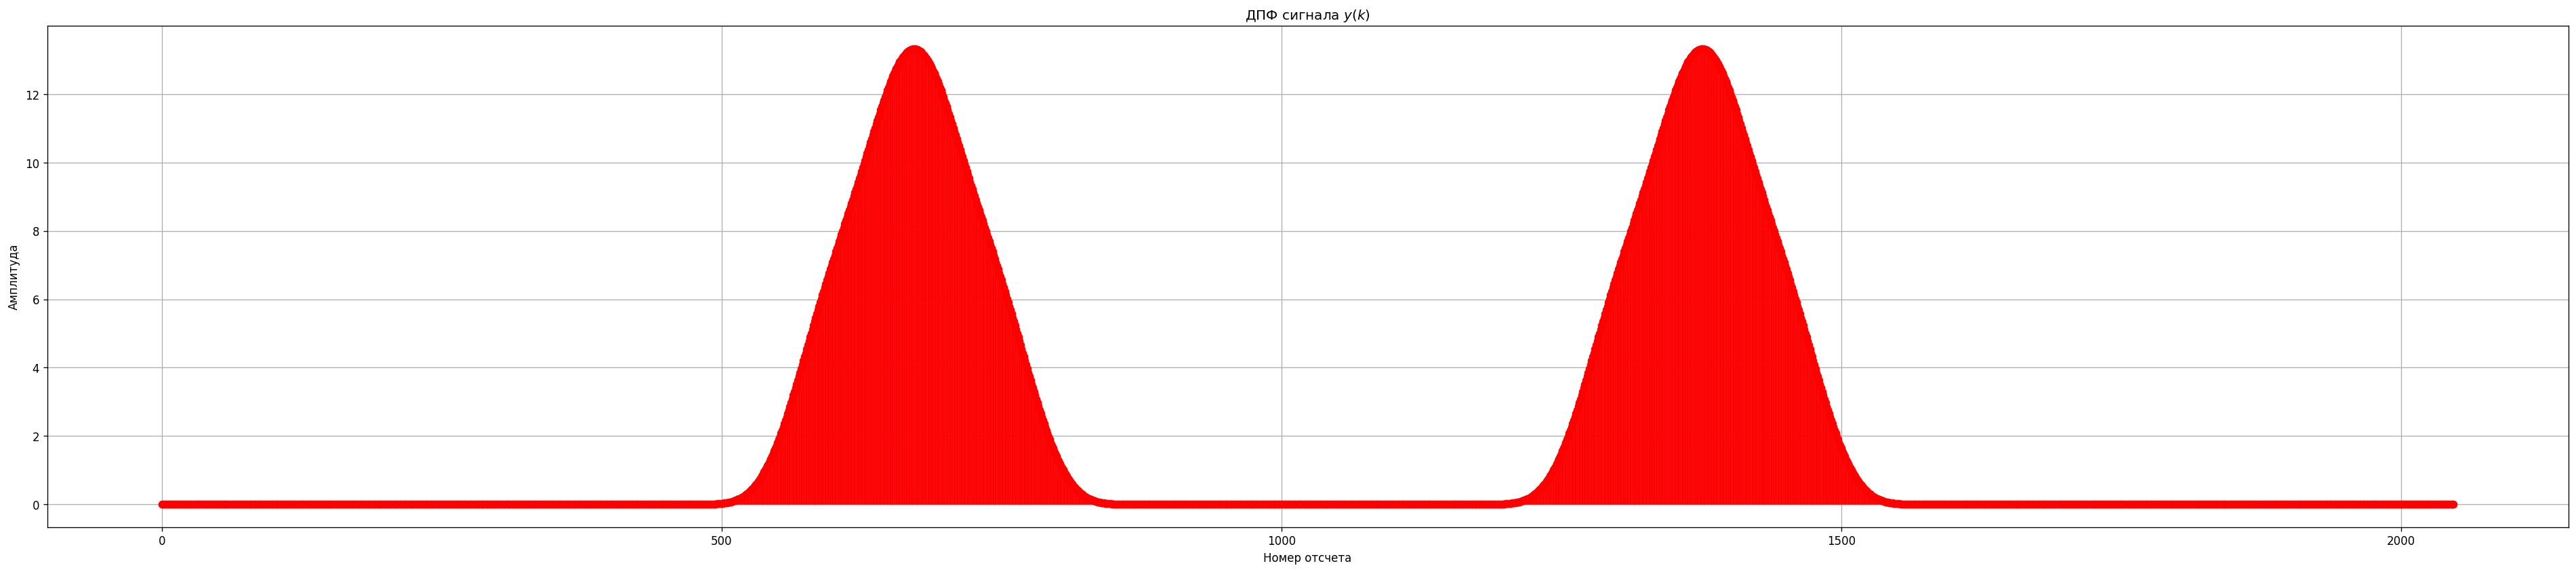

'\nplt.figure(figsize=[40, 8])\nplt.plot(nu, np.abs(Y))\nplt.xlabel(\'$\\nu$\')\nplt.ylabel(\'$|Y(\\nu)|$\')\nplt.title("ДВПФ $y[k]$")\nplt.grid()\nplt.tight_layout()\nplt.show()\n'

In [16]:
y = x * w3

plt.figure(figsize=[8, 3])
plt.stem(k, y, linefmt='b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel('$y[k]$')

plt.grid()
plt.tight_layout()


nu, Y=DTFT(y, 2048)

Y_FFT = np.fft.fft(y, M) 
n = np.arange(Y_FFT.size)

plt.figure(figsize=(40, 8), dpi=120)
plt.stem(n , np.abs(Y_FFT), markerfmt="ro", basefmt=" ", linefmt="r", label="ДПФ")
plt.xlabel("Номер отсчета")
plt.ylabel("Амплитуда")
plt.title("ДПФ сигнала $y(k)$")
plt.grid()
plt.show()

'''
plt.figure(figsize=[40, 8])
plt.plot(nu, np.abs(Y))
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|$')
plt.title("ДВПФ $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()
'''

## Задача 1.2. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav |


1) Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи).

2) Вычислить 2048-точечное ДПФ для $x[k]$, используя
* а) матричную форму ДПФ,
* б) быстрое преобразование Фурье.

Сравнить результаты.

3) Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$.

---

**Алгоритм Герцеля**

1. Для $m=0,\,1,\, \dots,\, N-1$ определяем

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2. Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



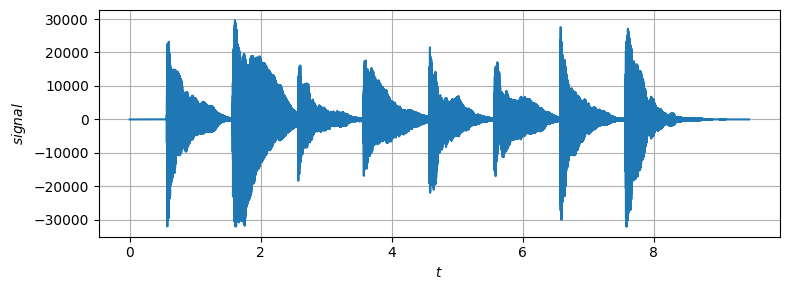

In [17]:
from scipy.io import wavfile
f, sig = wavfile.read(f'major-scale-piano.wav')
sig = np.transpose(sig[:, :1])[0]
plt.figure(figsize=[8, 3])
plt.plot(np.linspace(0, len(sig) / f, len(sig)), sig)
plt.xlabel('$t$')
plt.ylabel('$signal$')

plt.grid()
plt.tight_layout()
plt.show()

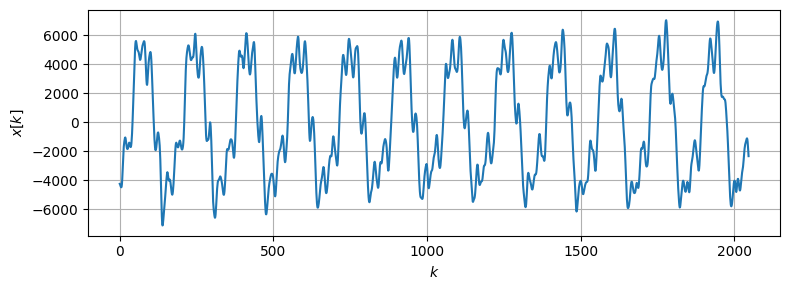

In [18]:
x = sig[40000:42048]
plt.figure(figsize=[8, 3])
plt.plot(np.arange(0, 2048, 1), x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')

plt.grid()
plt.tight_layout()
plt.show()

2047 отсчет ДПФ (-62479.77343852016+11329.975801386627j)


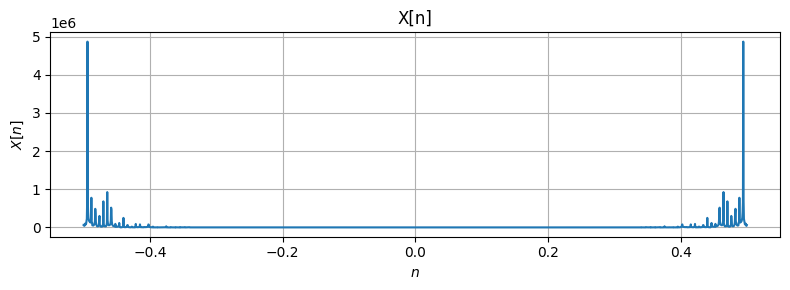

In [19]:
from scipy.linalg import dft
W = dft(2048)
Xn2 = W @ x
print('2047 отсчет ДПФ', Xn2[2047])
plt.figure(figsize=[8, 3])
plt.plot(nu, np.abs(Xn2))
plt.xlabel('$n$')
plt.ylabel('$X[n]$')
plt.title("X[n]")
plt.grid()
plt.tight_layout()
plt.show()

2047 отсчет ДПФ (-62479.77343851233+11329.975801499408j)


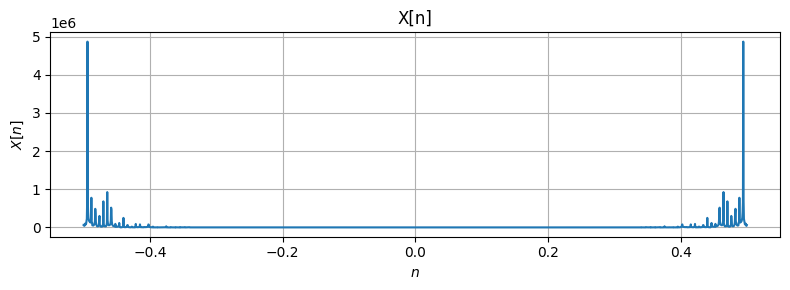

In [20]:
Xn1 = np.fft.fft(x, 2048)
print('2047 отсчет ДПФ', Xn1[2047])
plt.figure(figsize=[8, 3])
plt.plot(nu, np.abs(Xn1))
plt.xlabel('$n$')
plt.ylabel('$X[n]$')
plt.title("X[n]")
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
from scipy import signal
n=2047
N = 2048

def w(n, k=1, N=2):
    return np.exp(-2j*np.pi*n*k/N)


beta=np.array([w(n=-n, k=1, N=N), -1.0], dtype=complex)
alpha=np.array([1.0, -2.0*np.cos(2*np.pi*n/N),1.0], dtype=complex)


y = signal.lfilter(beta, alpha, x)
print(f"БПФ: {Xn1[n]}, Герцель: {y[N - 1]}")

БПФ: (-62479.77343851233+11329.975801499408j), Герцель: (-62479.7734384653+11329.975801990053j)


# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav | major-scale-piano.wav | xylophone1.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы?

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










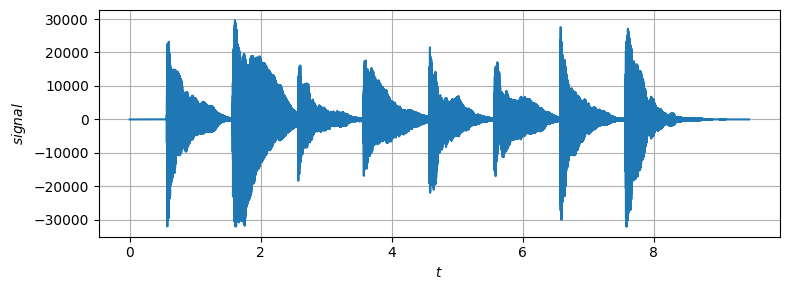

In [22]:
from scipy.io import wavfile
fs, sig = wavfile.read(f'major-scale-piano.wav')
sig = np.transpose(sig[:, :1])[0]
plt.figure(figsize=[8, 3])
plt.plot(np.linspace(0, len(sig) / fs, len(sig)), sig)
plt.xlabel('$t$')
plt.ylabel('$signal$')

plt.grid()
plt.tight_layout()
plt.show()

In [23]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 8000), nperseg=8000, noverlap=4000)

np.True_

In [24]:
from scipy import signal
signal.check_NOLA(window=signal.get_window('hann', 8000), nperseg=8000, noverlap=4000)

np.True_

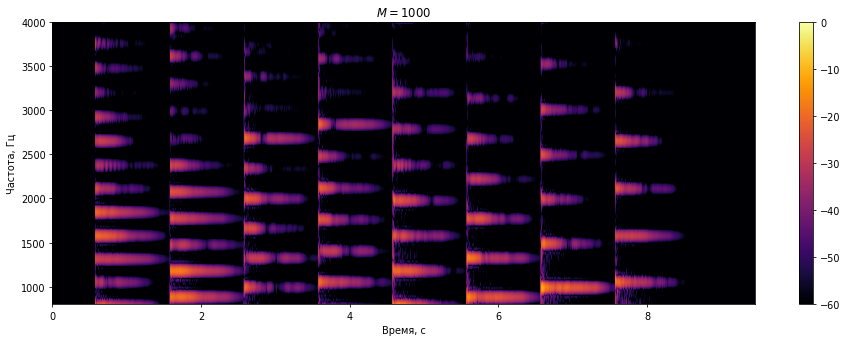

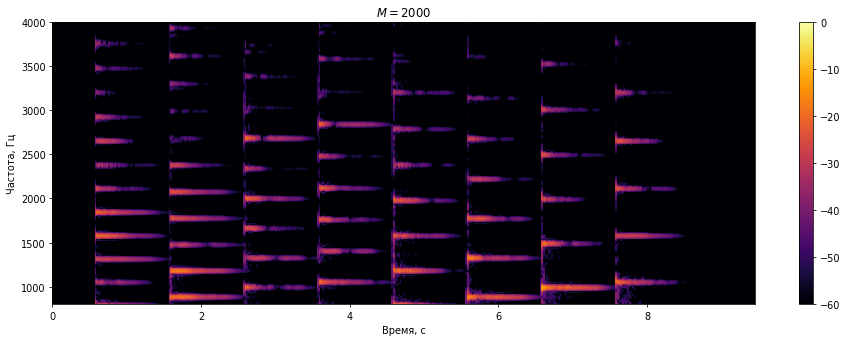

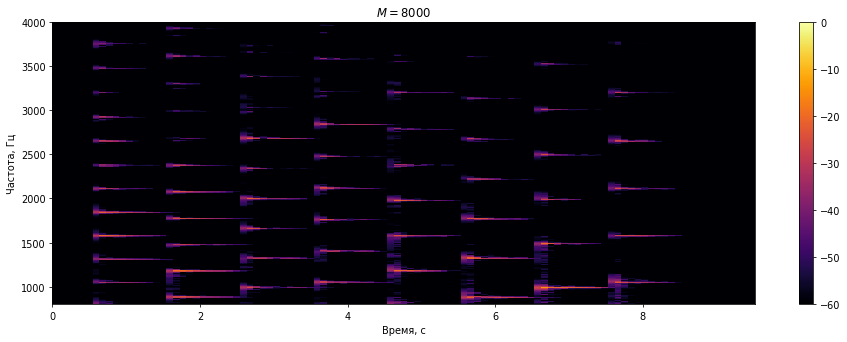

In [25]:
for nperseg in [1000, 2000, 8000]:
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(sig, fs=fs, window=('hann'), nperseg=nperseg, noverlap=noverlap, nfft=2**14)
    plt.figure(figsize=[13.5, 5], num='R = %i' % (nperseg-noverlap), dpi=70)
    plt.title('$M = $%i' % nperseg)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((800, 4000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()



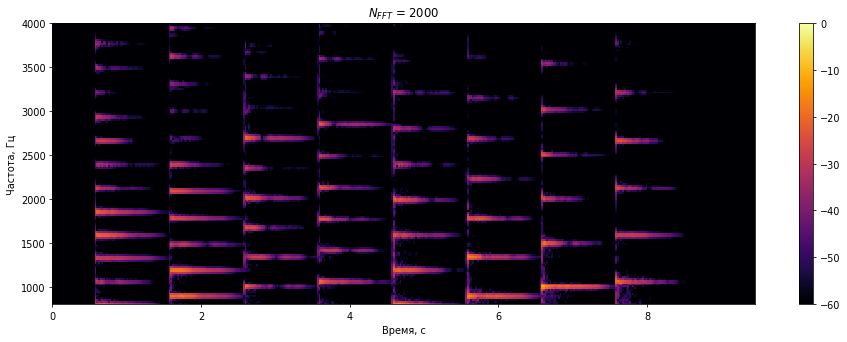

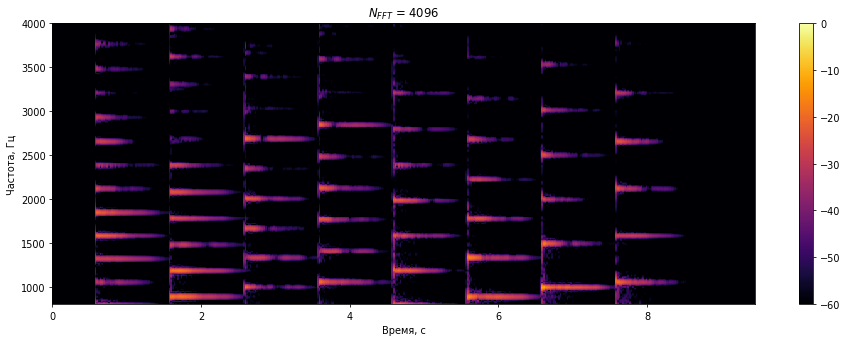

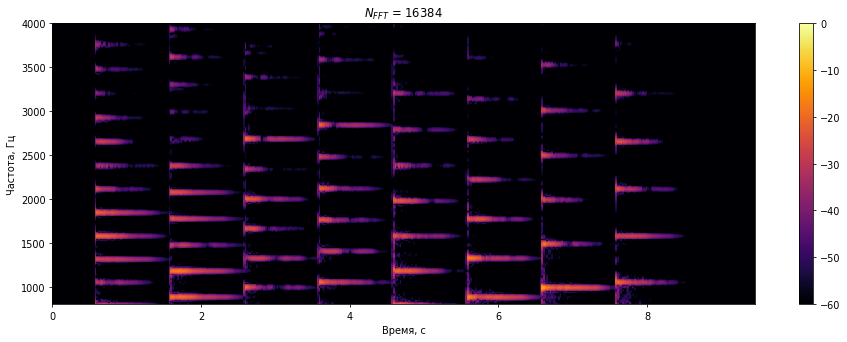

In [26]:
for nfft in [2000, 2**12, 2**14]:
    nperseg=2000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(sig, fs=fs, window=('hann'), nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    plt.figure(figsize=[13.5, 5], num='nfft = %i' % (nfft), dpi=70)
    plt.title('$N_{FFT}$ = %i' % nfft)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((800, 4000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()


<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\l'
C:\Users\kirza\AppData\Local\Temp\ipykernel_12420\1328307793.py:32: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')


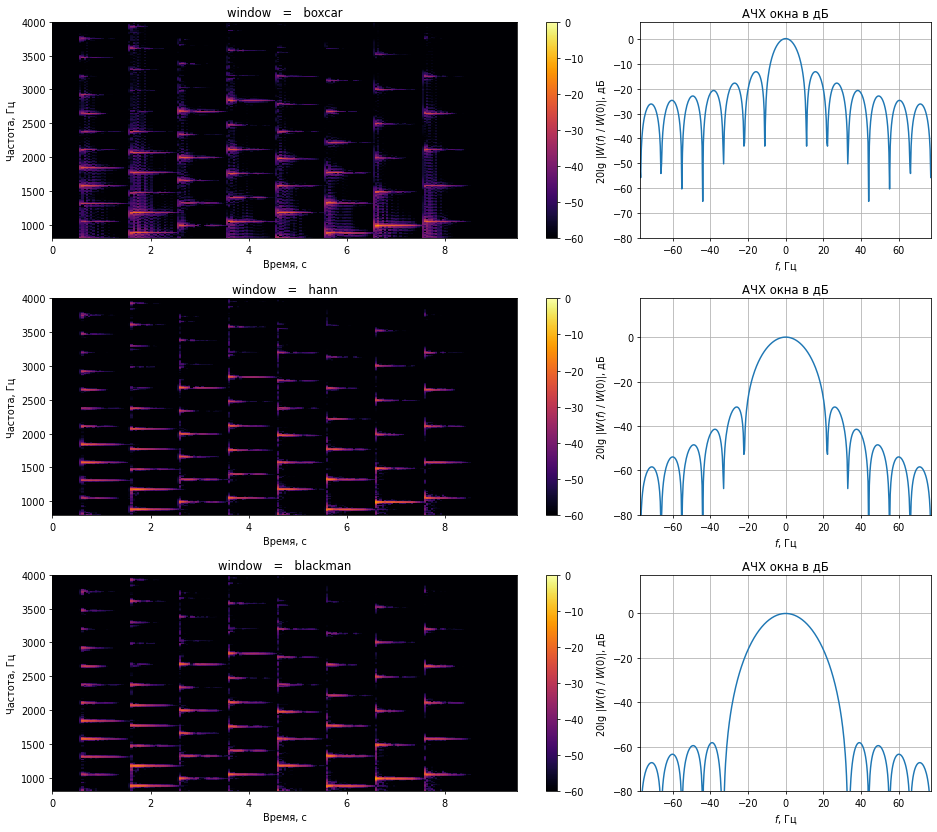

In [27]:
from matplotlib import gridspec
windows=['boxcar', 'hann', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann',
    plt.subplot(gs[u*2], title='window   =   %s' % (window))

    nperseg=4000
#     noverlap=nperseg*2//3
    noverlap=nperseg//2


    f, t, Zxx = signal.stft(sig, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    with np.errstate(divide='ignore'):
        plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(np.abs(Zxx[:-1, :-1]))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((800, 4000))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    nu, Wn = DTFT(w, M=2**17)
    with np.errstate(divide='ignore'):
        plt.plot(nu*fs, 20*np.log10(abs(Wn)/max(abs(Wn))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')

    plt.tight_layout()
    u+=1




In [28]:
print(f'2. Длина окна: {8000 / fs * 1000:.2f} мс')
print(f'   Перекрытие: {4000 / fs * 1000:.2f} мс')
print()

print(f'3. Разрешение по времени: {(8000 - 4000) / fs * 1000:.2f} мс/дел')
print(f'   Разрешение по частоте: {fs / nfft:.2f} Гц/дел')


2. Длина окна: 181.41 мс
   Перекрытие: 90.70 мс

3. Разрешение по времени: 90.70 мс/дел
   Разрешение по частоте: 2.69 Гц/дел


#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy |


По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае?

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`).

In [29]:
x = np.load('variant_1_ex_2_1.npy')
fs = 16000

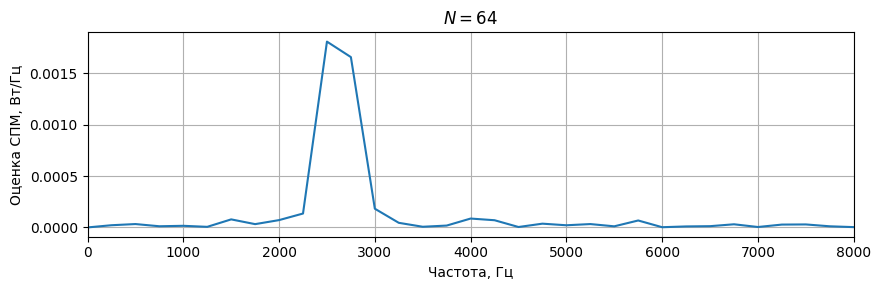

In [30]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=len(x), scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
plt.show()



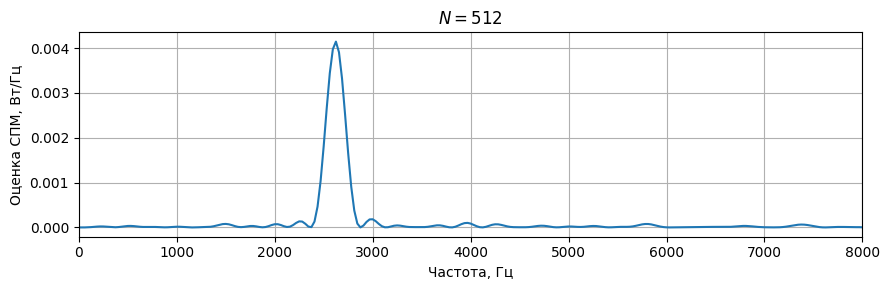

In [31]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=len(x)*8, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %(len(x) * 8))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
#plt.savefig('psd_1.svg')
plt.show()



## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

In [32]:
N = 64
scale = 20
a1 = 5
fs = 16000
f0= 2000

In [33]:
k = np.arange(0, N, 1)
x = a1 * np.sin(2 * np.pi * k * f0/fs) + np.random.normal(scale=20, size=N)

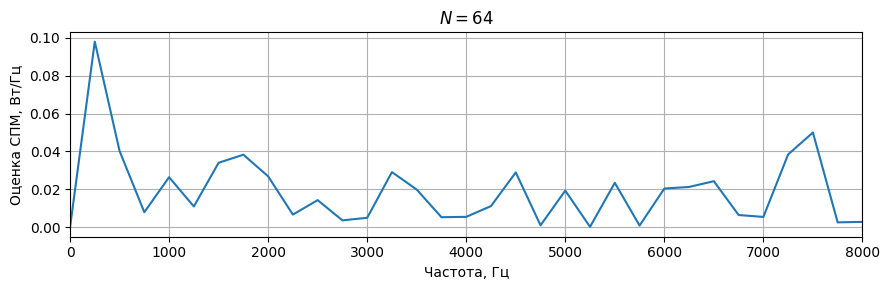

In [34]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %N)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
plt.show()



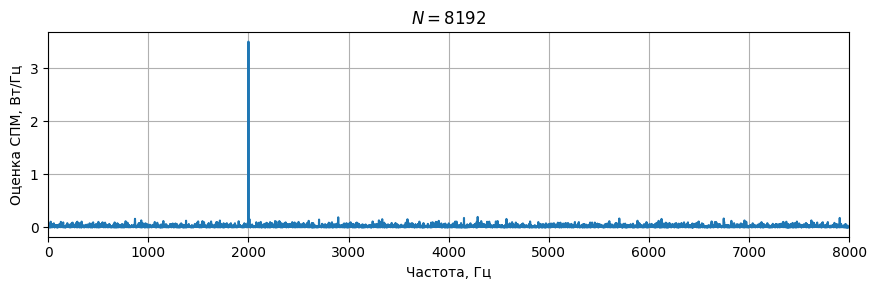

In [35]:
N = 2 ** 13
k = np.arange(0, N, 1)
x = a1 * np.sin(2 * np.pi * k * f0/fs) + np.random.normal(scale=20, size=N)
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=N, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %N)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
plt.show()



#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy |

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты.

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


### Периодограмма

In [36]:
x = np.load('variant_1_ex_3_1.npy')

In [37]:
fs = 16000

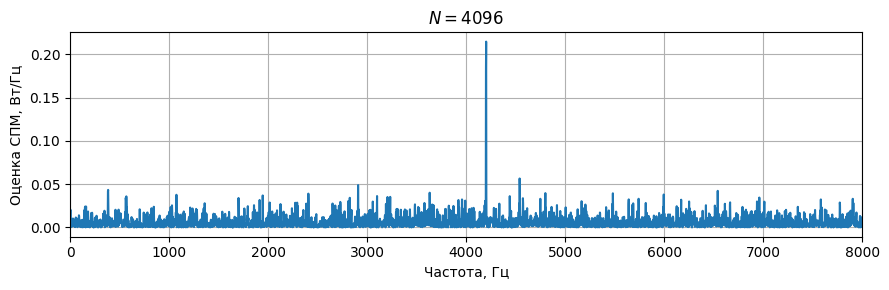

In [38]:
plt.figure(figsize=[9, 3])
f, Pxx_den = signal.periodogram(x, fs=fs, nfft=2 ** 13, scaling='density')
plt.plot(f, Pxx_den/2)
plt.xlim([0, fs/2])
plt.grid()
plt.title("$N = %i$" %len(x))
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.tight_layout()
plt.show()


### Блэкман-Тьюки

In [39]:
def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / len(x)
    lag = np.arange(-(len(x)-1), len(x))
    return Rx[np.logical_and(lag<=N1-1, lag>=0)]

In [40]:
def  blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

In [41]:
f, P_BT = blackman_tukey_estimator(x, window='bartlett', Nfft= 2 ** 15, fs=fs)

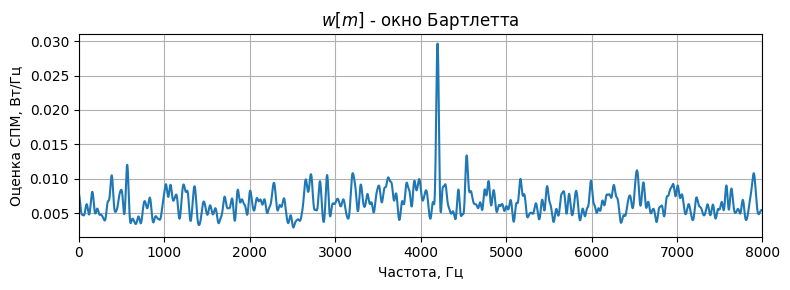

In [42]:
plt.figure(figsize=[8, 3])
#plt.stem(f, P_BT, 'b', 'b.')
plt.plot(f, P_BT)
plt.xlim([0, fs/2])
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.title('$w[m]$ - окно Бартлетта')
plt.grid()
plt.tight_layout()
plt.show()

### Модифицированная периодограмма Уэлча

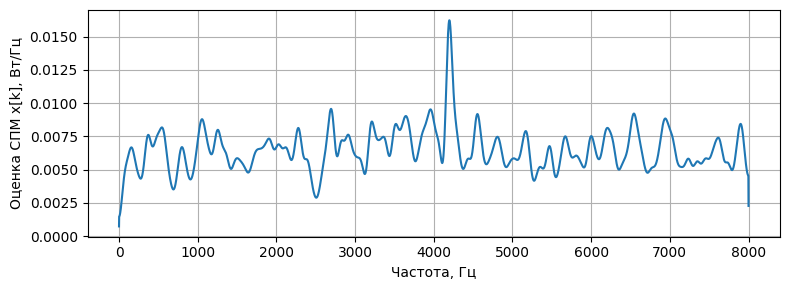

In [43]:
f, Pxy = signal.csd(x, x, fs, nfft=2 ** 13)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ x[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()


## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 4.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 4.1.

In [44]:
def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / (len(x) if mode == 'biased' else 1)
    N = len(x)
    if mode == 'unbiased':
        for m in range(0, len(Rx)):
          Rx[m] = Rx[m] * (N - np.abs(m)) / N
    lag = np.arange(-(len(x)-1), len(x))
    Rx =  Rx[np.logical_and(lag<=N1-1, lag>=0)]


    return Rx

def blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

In [45]:
f, P_BT = blackman_tukey_estimator(x, window='bartlett', Nfft= 2 ** 13, fs=fs, auto_correlation_mode = 'unbiased')

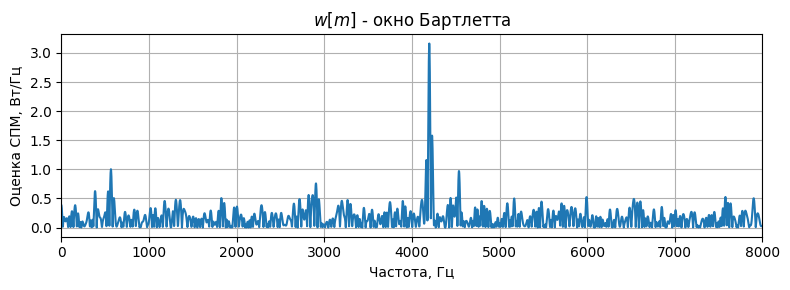

In [46]:
plt.figure(figsize=[8, 3])
#plt.stem(f, P_BT, 'b', 'b.')
plt.plot(f, np.abs(P_BT))
plt.xlim([0, fs/2])
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.title('$w[m]$ - окно Бартлетта')
plt.grid()
plt.tight_layout()
plt.show()


## Задача 4.3*. Оценка кросс-спектральной плотности мощности

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy  | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy |

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы.

In [47]:
x, y = np.load('variant_1_ex_3_3.npy')

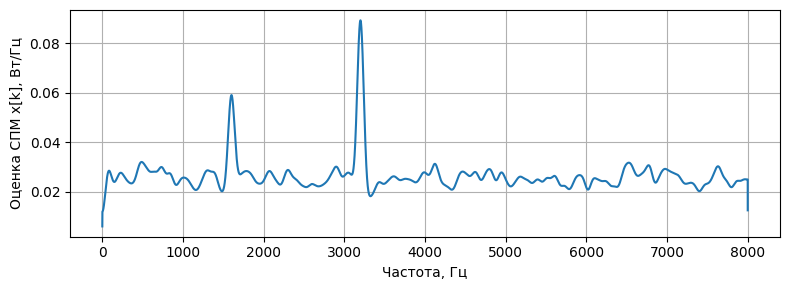

In [48]:
f, Pxx = signal.csd(x, x, fs, nfft=2 ** 13 * 8)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxx)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ x[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

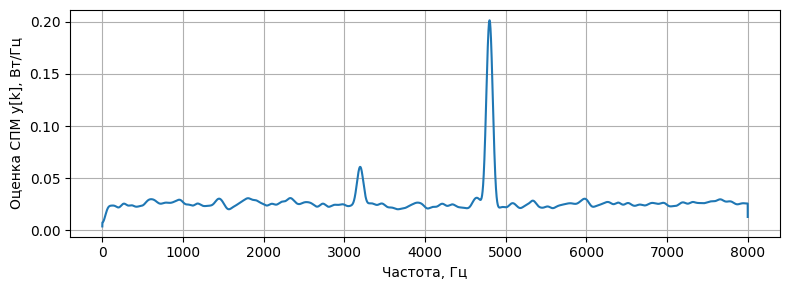

In [49]:
f, Pyy = signal.csd(y, y, fs, nfft=2 ** 13 * 8)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pyy)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ y[k], Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()


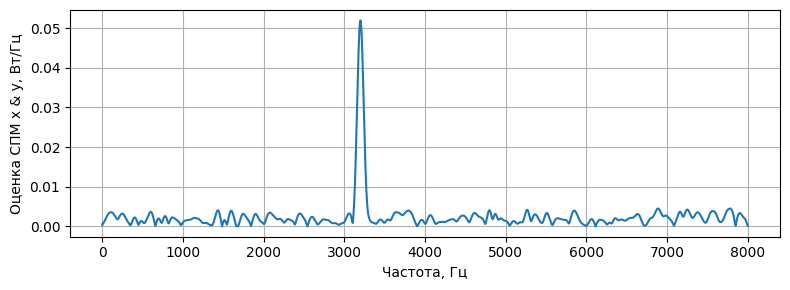

In [50]:
f, Pxy = signal.csd(x, y, fs, nfft=2 ** 13 * 8)
plt.figure(figsize=[8, 3])
#plt.semilogy(f, np.abs(Pxy))
plt.plot(f, np.abs(Pxy)/2)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ x & y, Bт/Гц')
plt.grid()
plt.tight_layout()
plt.show()

## Задача 4.4. Периодограмма Ломба-Скаргла


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |       7      |     8     |         9        |      10     |        11        |        12       |       13      |     14     |         15        |      16     |        17        |        18       |       19      |     20     |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy |



Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`).

In [51]:
x, t = np.load('variant_1_ex_3_4.npy')

In [52]:
w=np.linspace(fs/2**14, fs/2, 2**12)*2*np.pi

In [53]:
pgram = signal.lombscargle(t, x, w, normalize=True)

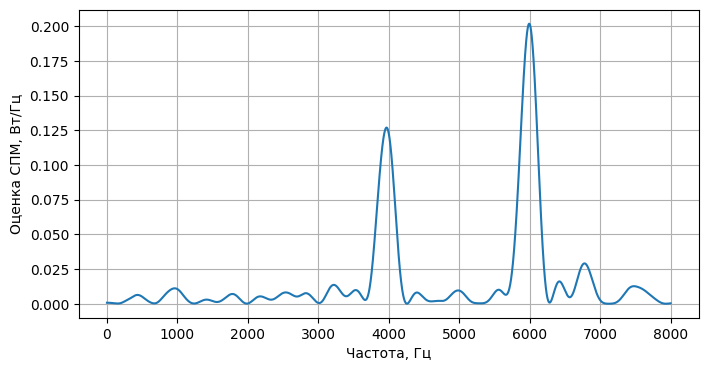

In [54]:
plt.figure(figsize=[8, 4])
plt.plot(w/(2*np.pi), pgram)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.grid()
plt.show()